In [34]:
from sklearn import datasets, ensemble, metrics, model_selection, dummy
import matplotlib.pyplot as plt

digits = datasets.load_digits()

# First we work only on sevens:
sevens = (digits.target == 7)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, sevens, random_state=0)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [38]:
s = logisticRegr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [39]:
y_score = s.predict_proba(X_test)

In [40]:
most_frequent = dummy.DummyClassifier(strategy='most_frequent')

In [41]:
most_frequent_score = most_frequent.fit(X_train,y_train).predict_proba(X_test)


In [42]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_score[:, 1])

In [43]:
roc_auc = metrics.auc(fpr, tpr)

In [44]:
fpr_dummy, tpr_dummy, _ = metrics.roc_curve(y_test,
                                            most_frequent_score[:, 1])
roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k = knn.fit(X_train, y_train)

In [47]:
k_score = k.predict_proba(X_test)

In [48]:
kfpr, ktpr, _ = metrics.roc_curve(y_test, k_score[:, 1])

In [49]:
kroc_auc = metrics.auc(kfpr, ktpr)

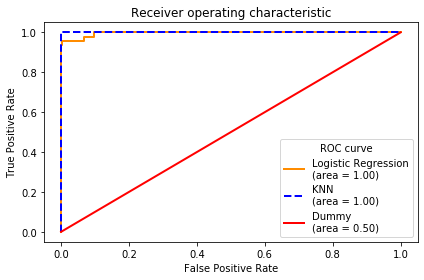

In [52]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Logistic Regression\n(area = %0.2f)' % roc_auc)
plt.plot(kfpr, ktpr, "b--",
         lw=lw, label='KNN\n(area = %0.2f)' % kroc_auc)
plt.plot(fpr_dummy, tpr_dummy, color='red',
         lw=lw, label='Dummy\n(area = %0.2f)' % roc_auc_dummy)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", title='ROC curve')
plt.tight_layout()